In [7]:
import pandas as pd

房价数据 = pd.read_csv('./house_data.csv')

# 删除索引列
房价数据 = 房价数据.iloc[:, 1:]
# 删除数据中的所有空值
房价数据.dropna(axis=0, inplace=True)
# 将单价“元/平米”去掉
房价数据['单价'].replace('元/平米', '', regex=True, inplace=True)
# 将单价转换为浮点类型
房价数据['单价'] = 房价数据['单价'].astype(float)
# 将总价“万”去掉
房价数据['总价'].replace('万', '', regex=True, inplace=True)
# 将房子总价转换为浮点类型
房价数据['总价'] = 房价数据['总价'].astype(float)
# 将建筑面价“平米”去掉
房价数据['建筑面积'].replace('平米', '', regex=True, inplace=True)
# 将建筑面积转换为浮点类型
房价数据['建筑面积'] = 房价数据['建筑面积'].astype(float)

房价数据

,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域
0,中天北湾新城,89.0,2室2厅1卫,89.00,10000.0,南北,低层,毛坯,高新
1,桦林苑,99.8,3室2厅1卫,143.00,6979.0,南北,中层,毛坯,净月
2,嘉柏湾,32.0,1室1厅1卫,43.30,7390.0,南,高层,精装修,经开
3,中环12区,51.5,2室1厅1卫,57.00,9035.0,南北,高层,精装修,南关
4,昊源高格蓝湾,210.0,3室2厅2卫,160.80,13060.0,南北,高层,精装修,二道
...,...,...,...,...,...,...,...,...,...
2578,园丁花园,115.0,3室2厅2卫,153.95,7470.0,南北,低层,精装修,净月
2579,枫林园,99.8,2室2厅1卫,91.30,10931.0,南北,中层,精装修,二道
2580,经开四区,75.0,2室2厅1卫,110.00,6818.0,南北,中层,精装修,经开
2581,华盛碧水云天,100.0,2室2厅1卫,109.73,9113.0,南北,中层,精装修,汽开


In [8]:
区域数据 = 房价数据.groupby('区域')
区域均价 = 区域数据['单价'].mean()
区域出售 = 区域数据['区域'].count()
总出售数 = 区域出售.sum()
区域出售占比 = 区域出售 / 总出售数
装修程度统计 = 房价数据.groupby('装修')['装修'].count()
热门户型数量统计 = 房价数据[['户型', '单价']].groupby('户型').count()

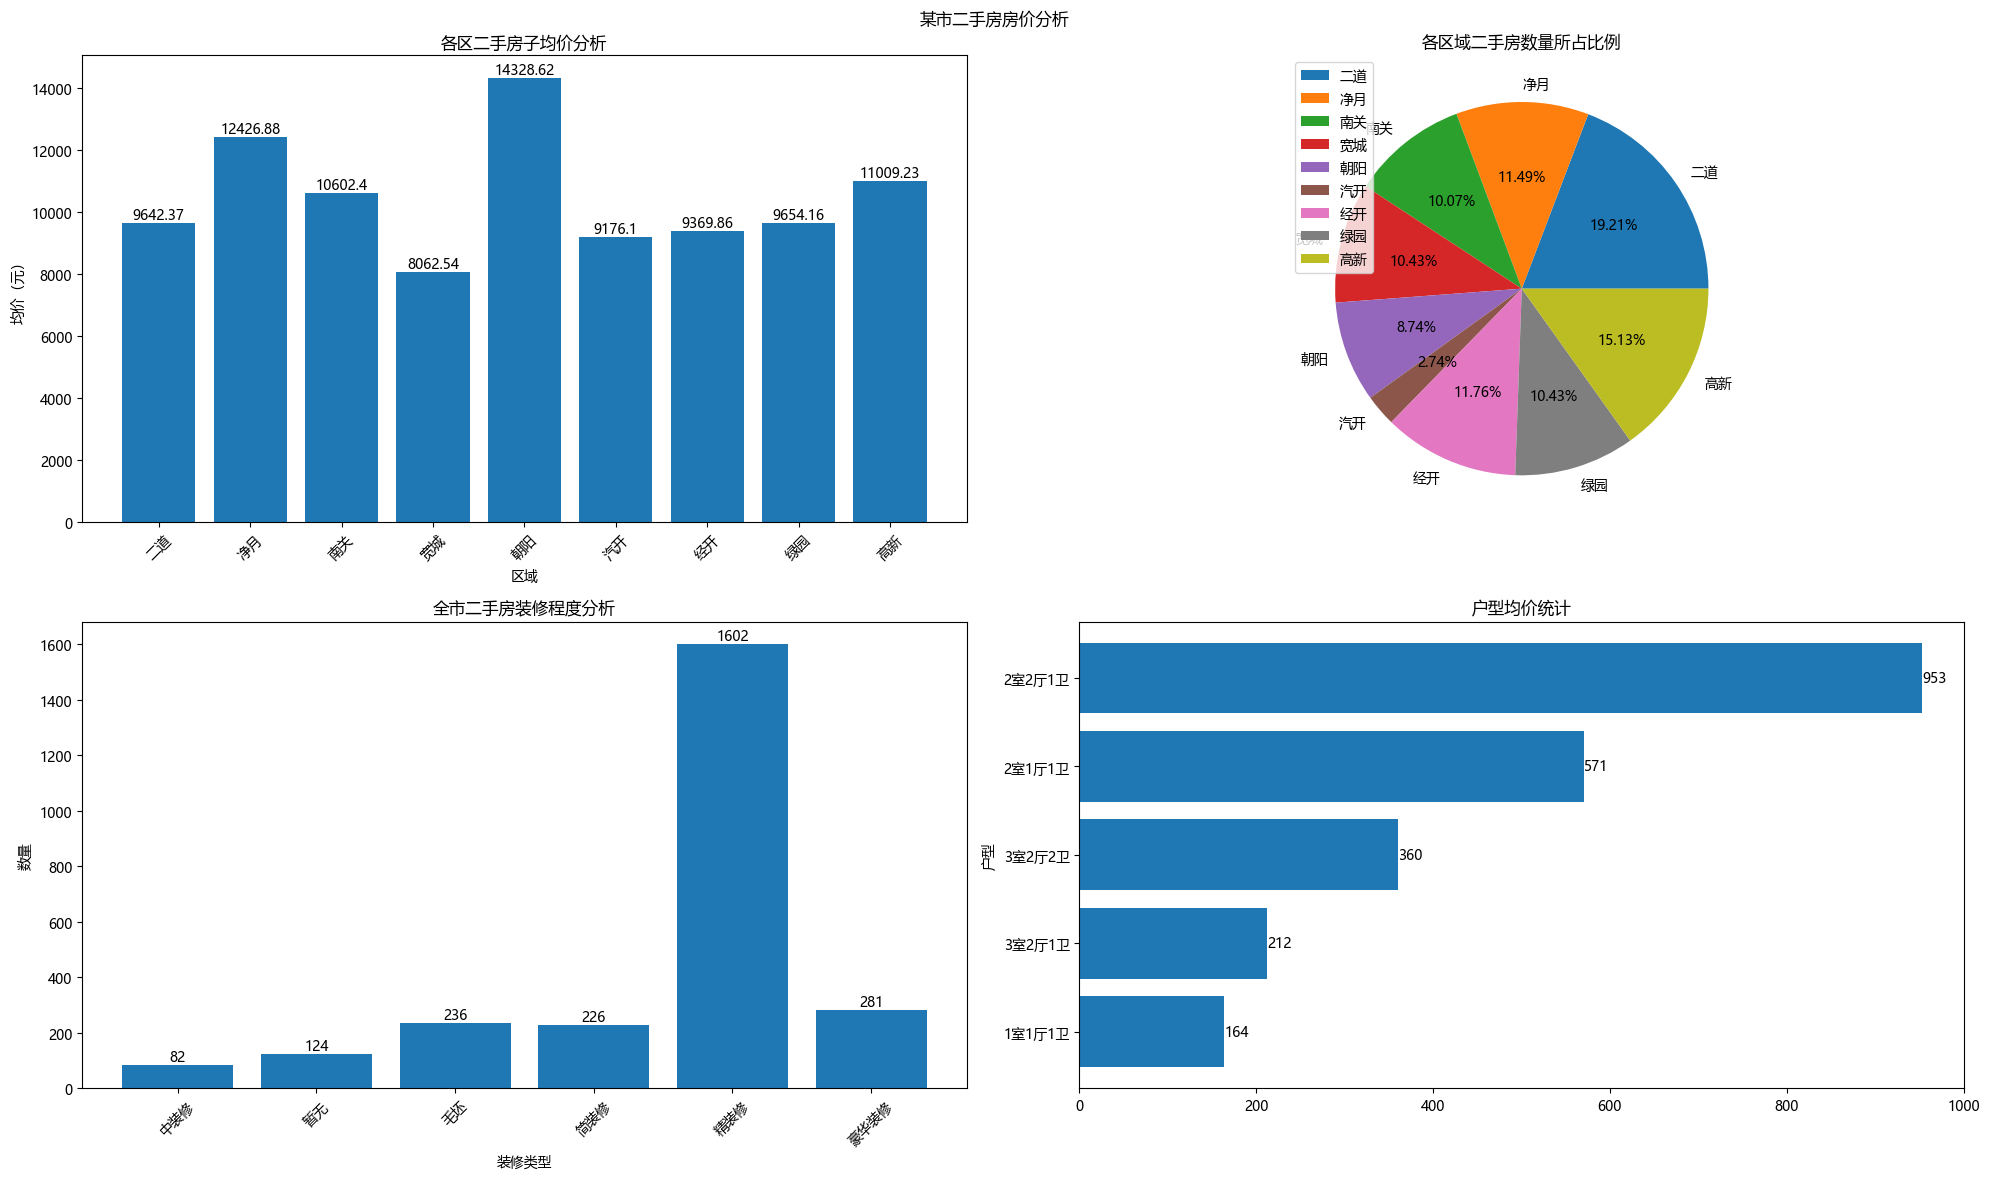

In [9]:
import matplotlib.pyplot as 绘图

绘图.rcParams['font.family'] = 'microsoft yahei'
图表 = 绘图.figure(figsize=(20, 12), dpi=100)
绘图.suptitle('某市二手房房价分析')

# 柱状图 - 区域均价
区域均价柱状图 = 图表.add_subplot(2, 2, 1)
区域均价柱状图.bar(区域均价.index, 区域均价.values)
区域均价柱状图.set_title('各区二手房子均价分析')
区域均价柱状图.set_xlabel('区域')
区域均价柱状图.set_ylabel('均价（元）')
# 为每个柱子添加数值标签
for i in range(len(区域均价)):
  区域均价柱状图.text(
    x=i, y=区域均价.values[i],
    s=str(round(区域均价.values[i], 2)),
    ha='center', va='bottom'
  )
区域均价柱状图.set_xticks(range(len(区域均价)))
# 添加旋转以避免标签重叠
区域均价柱状图.set_xticklabels(区域均价.index, rotation=45)


# 饼图 - 区域出售占比
区域出售占比饼图 = 图表.add_subplot(2, 2, 2)
区域出售占比饼图.pie(
  区域出售占比.values,
  labels=区域出售占比.index,
  autopct="%.2f%%"
)
区域出售占比饼图.set_title('各区域二手房数量所占比例')
区域出售占比饼图.legend(loc=2)


# 柱状图 - 装修程度统计
装修程度统计柱状图 = 图表.add_subplot(2, 2, 3)
装修程度统计柱状图.bar(装修程度统计.index, 装修程度统计.values)
装修程度统计柱状图.set_title('全市二手房装修程度分析')
装修程度统计柱状图.set_xlabel('装修类型')
装修程度统计柱状图.set_ylabel('数量')
# 为每个柱子添加数值标签
for i in range(len(装修程度统计)):
  装修程度统计柱状图.text(
    x=i, y=装修程度统计.values[i],
    s=str(装修程度统计.values[i]),
    ha='center', va='bottom'
  )
装修程度统计柱状图.set_xticks(range(len(装修程度统计)))
# 添加旋转以避免标签重叠
装修程度统计柱状图.set_xticklabels(装修程度统计.index, rotation=45)


# 柱状图 - 户型均价（这里你可能想要显示的是均价而不是数量）
热门户型数量排序后的前五个 = 热门户型数量统计.nlargest(5, columns='单价')

户型均价柱状图 = 图表.add_subplot(2, 2, 4)
户型均价柱状图.barh(热门户型数量排序后的前五个.index, 热门户型数量排序后的前五个['单价'])
户型均价柱状图.set_title('户型均价统计')
户型均价柱状图.set_ylabel('户型')
# 为每个柱子添加数值标签
for i in range(len(热门户型数量排序后的前五个)):
  户型均价柱状图.text(
    x=热门户型数量排序后的前五个['单价'].iloc[i],
    y=i, s=str(round(热门户型数量排序后的前五个['单价'].iloc[i], 2)),
    ha='left', va='center'
  )
# 反转 y 轴以使顺序与数据框中的顺序相匹配
户型均价柱状图.invert_yaxis()

# 调整子图之间的间距以避免重叠
绘图.tight_layout()
绘图.show()

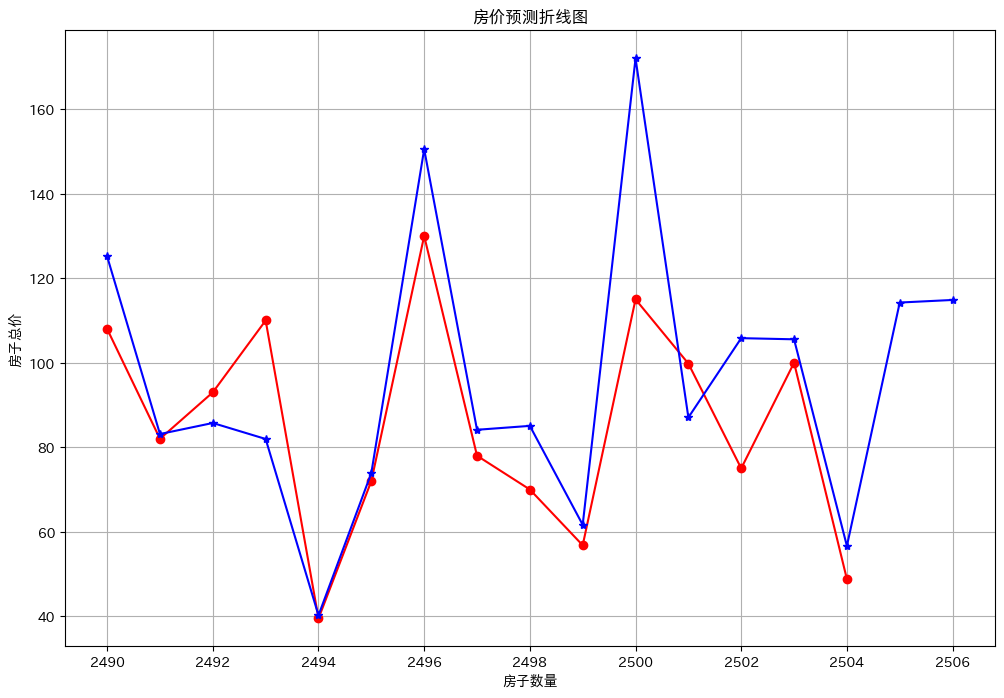

In [4]:
from sklearn.svm import LinearSVR

# 拷贝构造
data = pd.DataFrame(房价数据)

# 划分'室'、'厅'、'卫'
data[['室', '厅', '卫']] = data['户型'].str.extract('(\d+)室(\d+)厅(\d+)卫')
data['室'] = data['室'].astype(float)  # 将房子室转换为浮点类型
data['厅'] = data['厅'].astype(float)  # 将房子厅转换为浮点类型
data['卫'] = data['卫'].astype(float)  # 将房子卫转换为浮点类型

# 只保留有效列
for i in data.columns:
  if i not in ('建筑面积', '总价', '室', '厅', '卫'):
    del data[i]
data.dropna(axis=0, how='any', inplace=True)

#  添加自定义预测数据
new_data = data[data['建筑面积'] < 300].reset_index(drop=True)
new_data.loc[2505] = [None, 120.0, 2.0, 1.0, 1.0]
new_data.loc[2506] = [None, 97.0, 3.0, 2.0, 2.0]
data_train = new_data.loc[:2504]

# 自变量参考列
x_list = ['建筑面积',  '室', '厅', '卫']

# 获取平均值
data_mean = data_train.mean()

# 获取标准偏差
data_std = data_train.std()

# 数据标准化
data_train = (data_train - data_mean) / data_std

# 特征数据
x_train = data_train[x_list].values

# 目标数据，总价
y_train = data_train['总价'].values

# 创建LinearSVR()对象
linearsvr = LinearSVR(C=0.1, dual=True)

# 训练模型
linearsvr.fit(x_train, y_train)

# 标准化特征数据
x = ((new_data[x_list] - data_mean[x_list]) / data_std[x_list]).values

# 添加预测房价的信息列
new_data[u'y_pred'] = linearsvr.predict(x) * data_std['总价'] + data_mean['总价']

y = new_data[['总价']][2490:]
y_pred = new_data[['y_pred']][2490:]
绘图.figure(figsize=(12, 8), dpi=100)
绘图.rcParams['font.family'] = 'LXGW Neo XiHei'
绘图.title('房价预测折线图')
绘图.grid()

绘图.plot(y, color='r', marker='o', label='真实房价')
绘图.plot(y_pred, color='b', marker='*', label='预测房价')
绘图.xlabel('房子数量')
绘图.ylabel('房子总价')
绘图.show()